# GEOG 497 - Spring 2021 - Cryosphere & Climate Systems
### A3: Föhn winds driving Larsen C melt

### Code to create RACMO2.3p2 27-km snowmelt plots over the Antarctic Peninsula

You will need to specify:
* Start and end dates/times over which the SUM of snowmelt will be calculated
* Plot titles, min/max values, and contour interval

Output:
* Plot of RACMO2.3p2 snowmelt summed over the given time period. 

### Run the following code block first:

In [1]:
# import python packages that allow for data reading, analysis, and plotting
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfe

**These are the available daily RACMO2.3p2 snowmelt data to plot**

| Variable type   | Units  | Filename | Variable name | 
|-----------------|--------|----------|---------------|
| Snow melt flux | mm w.e. | RACMO2.3p2_ANT27_snowmelt_daily_2011_2019_08.nc | snowmelt |

Advice:
* Note that these data are daily averages, not 3-hourly like the SEB terms, so they will include *some* non-fohn conditions. 
* Also note that these data are from a continent-wide version of RACMO2.3p2 run at 27-km resolution. The SEB terms you analyzed were from an AP-specific simulation of RACMO at a higher 5.5km resolution.

### In the following code block, you will set the time period of interest. After editing, be sure to run. 

In [2]:
# [-------- EDIT THIS SECTION --------]
# define the time perid of interest (the major fohn event id'ed at AWS18)
# Values need to be in a specific format, like: 2021-03-02T13:00 [YYYY-MM-DDTHH:MM]
starttime = '2016-05-25T09:00'
endtime = '2016-05-27T10:00'

### Below is the code that creates a plot using the parameters you specify at the top of the block. 

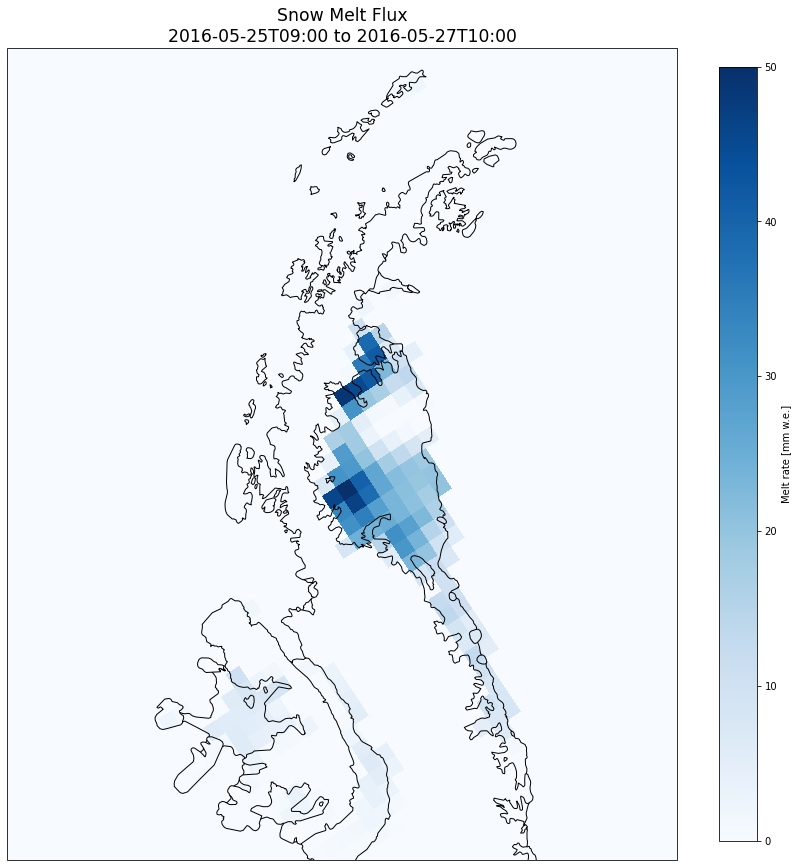

In [6]:
# [-------- EDIT THIS SECTION --------]
# Set the appropriate data file name and variable name using the above reference
data_file_name = 'RACMO2.3p2_ANT27_snowmelt_daily_2011_2019_08.nc'
variable_name = 'snowmelt'

# set the plot and colorbar titles
plot_title = 'Snow Melt Flux'
colorbar_label = 'Melt rate [mm w.e.]'

# set the min and max values of your plot, as well as the contour interval
# experiment with these to get a good looking plot
# these are numerical values not in quotes
min_plot_value = 0
max_plot_value = 50
contour_interval = 1

# choose a color map from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap_name = 'Blues'
reverse_colormap = False # True or False (must be capitalized and not in quotes)

# [-------- GENERALLY NO NEED TO EDIT BELOW--------]

# Read NetCDF, select variable, and take temporal mean over time of interest 
dataFolder = './Data/'
ds = xr.open_dataset(dataFolder + data_file_name)
var = ds[variable_name].squeeze() # squeeze gets rid of unncessary single-dimension coordinates 
data = var.sel(time=slice(starttime, endtime)).sum('time') # select the variable from the dataset over just the interval of interest, then take mean over the time dimension

# add a line here to scale the data field in some way (e.g., to convert units), e.g.,:
data = data * 86400 # [convert kg m-2 s-1 to kg m-2 d-1 or mm w.e.]

# Set up a plot: size, projection, and geographic extent. 
plt.figure(figsize=(15,15))
ax = plt.subplot(projection=ccrs.Stereographic(central_longitude=-45, central_latitude=-75))
ax.set_extent([-72,-52,-73,-62], ccrs.PlateCarree())

# This is some extra code that deals with rotated pole projection of RACMO
# Defines a Cartopy coordinate reference system for the data 
rlon = ds.rlon.values
rlat = ds.rlat.values
racmoCRS = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# This will set the minimum and maximum values on your plot: min, max, contour interval
clevs = np.arange(min_plot_value,max_plot_value+1,contour_interval)

# deal with colormap reversal, if set to True
if reverse_colormap:
    colormap_name = colormap_name + '_r' 
    
# Plot data 
result = ax.pcolormesh(rlon, rlat, data, vmin=min_plot_value, vmax=max_plot_value, transform=racmoCRS, cmap=colormap_name)

# add coastlines 
ax.coastlines(resolution='10m')
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '10m', edgecolor='k', facecolor='none'))

# This sets the colorbar info. Set the label here appropriate to the variable you're plotting.
plt.colorbar(result, orientation='vertical', label=colorbar_label, shrink=0.95, pad=0.05)

# This sets the title of the plot.
ax.set_title(plot_title + '\n' + starttime + ' to ' + endtime, size='xx-large')

# show the plot
plt.savefig('./Figures/aws18_fohn_event'+variable_name+'_RACMO'+'.png', dpi=300)
plt.show()